In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.data import data_collection

In [4]:
data_collection.download_data_and_load_into_sql()

DuplicateDatabase: database "opportunity_youth" already exists


In [5]:
import psycopg2
import pandas as pd

In [6]:
DBNAME = "opportunity_youth"

In [7]:
conn = psycopg2.connect(dbname=DBNAME)

In [8]:
pd.read_sql('''SELECT * 
               FROM pums_2017 PS
               JOIN puma_names_2010 PN
               ON PS.puma = PN.puma
               WHERE PS.puma SIMILAR TO '1161(0|1|2|3|4|5)'
               AND PS.agep >= 16 
               AND PS.agep <= 24
               AND PS.sch = '1'
               AND PS.dis = '2'
               AND PS.esr SIMILAR TO '%(3|6)%'
               ;''', conn)

,rt,serialno,division,sporder,puma,region,st,adjinc,pwgtp,agep,...,pwgtp78,pwgtp79,pwgtp80,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,P,2013000100470,9,04,11613,4,53,1061971,16.0,18.0,...,29.0,20.0,11.0,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
1,P,2013000047506,9,04,11615,4,53,1061971,5.0,20.0,...,1.0,6.0,1.0,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
2,P,2013000048962,9,05,11612,4,53,1061971,25.0,22.0,...,9.0,39.0,7.0,53,Washington ...,1046,11612,5311612,G53011612,"King County (Far Southwest)--Federal Way, Des ..."
3,P,2013000057563,9,05,11611,4,53,1061971,20.0,21.0,...,33.0,33.0,18.0,53,Washington ...,1045,11611,5311611,G53011611,"King County (West Central)--Burien, SeaTac, Tu..."
4,P,2013000058010,9,02,11614,4,53,1061971,45.0,17.0,...,48.0,51.0,54.0,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,P,2017001244336,9,07,11613,4,53,1011189,42.0,21.0,...,64.0,39.0,36.0,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
318,P,2017001295574,9,03,11611,4,53,1011189,18.0,17.0,...,6.0,29.0,5.0,53,Washington ...,1045,11611,5311611,G53011611,"King County (West Central)--Burien, SeaTac, Tu..."
319,P,2017001373291,9,02,11610,4,53,1011189,14.0,22.0,...,19.0,17.0,4.0,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
320,P,2017001366540,9,05,11613,4,53,1011189,21.0,23.0,...,6.0,20.0,24.0,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...


In [9]:
pd.read_sql('''SELECT * FROM puma_names_2010
               WHERE puma_name LIKE '%King County%';''', conn)

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,53,Washington ...,1044,11606,5311606,G53011606,"King County (Northwest)--Shoreline, Kenmore & ..."
1,53,Washington ...,1044,11607,5311607,G53011607,"King County (Northwest)--Redmond, Kirkland Cit..."
2,53,Washington ...,1044,11608,5311608,G53011608,King County (Northwest Central)--Greater Belle...
3,53,Washington ...,1044,11609,5311609,G53011609,"King County (Central)--Sammamish, Issaquah, Me..."
4,53,Washington ...,1044,11610,5311610,G53011610,"King County (Central)--Renton City, Fairwood, ..."
5,53,Washington ...,1044,11613,5311613,G53011613,King County (Southwest Central)--Kent City ...
6,53,Washington ...,1044,11614,5311614,G53011614,King County (Southwest)--Auburn City & Lakelan...
7,53,Washington ...,1044,11615,5311615,G53011615,"King County (Southeast)--Maple Valley, Covingt..."
8,53,Washington ...,1044,11616,5311616,G53011616,"King County (Northeast)--Snoqualmie City, Cott..."
9,53,Washington ...,1045,11611,5311611,G53011611,"King County (West Central)--Burien, SeaTac, Tu..."


In [10]:
pd.read_sql("SELECT * FROM wa_jobs_2017 LIMIT 10;", conn)

,w_geocode,c000,ca01,ca02,ca03,ce01,ce02,ce03,cns01,cns02,...,cfa02,cfa03,cfa04,cfa05,cfs01,cfs02,cfs03,cfs04,cfs05,createdate
0,530019501001010,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
1,530019501001024,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
2,530019501001026,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
3,530019501001044,1,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
4,530019501001053,2,0,2,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
5,530019501001061,7,1,3,3,0,5,2,7,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
6,530019501001090,2,0,2,0,0,2,0,2,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
7,530019501001099,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
8,530019501001104,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,2019-08-25
9,530019501001112,4,1,2,1,0,2,2,4,0,...,0,0,0,0,0,0,0,0,0,2019-08-25


In [11]:
pd.read_sql('''SELECT * FROM wa_geo_xwalk
               WHERE ctyname = 'King County, WA'
               LIMIT 10;''', conn)

,tabblk2010,st,stusps,stname,cty,ctyname,trct,trctname,bgrp,bgrpname,...,stanrcname,necta,nectname,mil,milname,stwib,stwibname,blklatdd,blklondd,createdate
0,530330325001075,53,WA,Washington ...,53033,"King County, WA ...",53033032500,"325 (King, WA) ...",530330325001,"1 (Tract 325, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.690229,-121.715711,2019-08-26
1,530330328003235,53,WA,Washington ...,53033,"King County, WA ...",53033032800,"328 (King, WA) ...",530330328003,"3 (Tract 328, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.707243,-121.626151,2019-08-26
2,530330297003059,53,WA,Washington ...,53033,"King County, WA ...",53033029700,"297 (King, WA) ...",530330297003,"3 (Tract 297, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.369791,-122.241507,2019-08-26
3,530330270002001,53,WA,Washington ...,53033,"King County, WA ...",53033027000,"270 (King, WA) ...",530330270002,"2 (Tract 270, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.501092,-122.324844,2019-08-26
4,530339901000053,53,WA,Washington ...,53033,"King County, WA ...",53033990100,"9901 (King, WA) ...",530339901000,"0 (Tract 9901, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.483771,-122.378470,2019-08-26
5,530330267004018,53,WA,Washington ...,53033,"King County, WA ...",53033026700,"267 (King, WA) ...",530330267004,"4 (Tract 267, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.488466,-122.365731,2019-08-26
6,530330276002004,53,WA,Washington ...,53033,"King County, WA ...",53033027600,"276 (King, WA) ...",530330276002,"2 (Tract 276, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.487632,-122.369284,2019-08-26
7,530330276003004,53,WA,Washington ...,53033,"King County, WA ...",53033027600,"276 (King, WA) ...",530330276003,"3 (Tract 276, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.472702,-122.370277,2019-08-26
8,530330283003052,53,WA,Washington ...,53033,"King County, WA ...",53033028300,"283 (King, WA) ...",530330283003,"3 (Tract 283, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.429948,-122.272653,2019-08-26
9,530330283003079,53,WA,Washington ...,53033,"King County, WA ...",53033028300,"283 (King, WA) ...",530330283003,"3 (Tract 283, King, WA) ...",...,None,99999,None,None,None,53000005,05 Seattle/King County WIB ...,47.419854,-122.267128,2019-08-26


In [12]:
pd.read_sql("SELECT * FROM ct_puma_xwalk LIMIT 10;", conn)

,statefp,countyfp,tractce,puma5ce
0,01,001,020100,02100
1,01,001,020200,02100
2,01,001,020300,02100
3,01,001,020400,02100
4,01,001,020500,02100
5,01,001,020600,02100
6,01,001,020700,02100
7,01,001,020801,02100
8,01,001,020802,02100
9,01,001,020900,02100


In [34]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline

In [85]:
file_name = "../../data/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area-shp/Zipcodes_for_King_County_and_Surrounding_Area___zipcode_area.shp"

In [117]:
king_county = gpd.read_file(file_name)

In [118]:
king_county

,OBJECTID,ZIP,ZIPCODE,COUNTY,ZIP_TYPE,Shape_Leng,Shape_Area,geometry
0,1,98031,98031,033,Standard,117508.232813,2.280129e+08,"POLYGON ((-122.21842 47.43750, -122.21935 47.4..."
1,2,98032,98032,033,Standard,166737.665152,4.826754e+08,"MULTIPOLYGON (((-122.24187 47.44122, -122.2411..."
2,3,98030,98030,033,Standard,94409.538568,2.000954e+08,"POLYGON ((-122.21006 47.38692, -122.21007 47.3..."
3,4,98029,98029,033,Standard,111093.715481,2.774247e+08,"POLYGON ((-121.97642 47.58430, -121.97645 47.5..."
4,5,98028,98028,033,Standard,71488.230747,1.996531e+08,"POLYGON ((-122.22788 47.76909, -122.22790 47.7..."
...,...,...,...,...,...,...,...,...
199,200,98580,98580,053,Standard,234421.906428,1.813778e+09,"POLYGON ((-122.42211 47.00514, -122.41906 47.0..."
200,201,98467,98467,053,Standard,65464.825750,1.545827e+08,"POLYGON ((-122.60713 47.20069, -122.59251 47.2..."
201,202,98498,98498,053,Standard,94191.629821,2.715042e+08,"POLYGON ((-122.52762 47.19747, -122.52667 47.1..."
202,203,98946,98946,037,Standard,148179.572807,8.366639e+08,"POLYGON ((-120.81410 47.04108, -120.81469 47.1..."


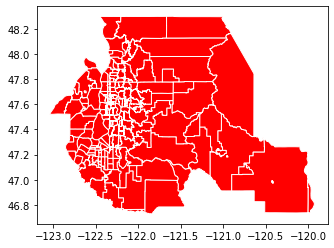

In [119]:
king_county.plot(color='red', edgecolor='white')

In [122]:
wa_file_name = "../../data/WA_State_Boundary-shp/WA_State_Boundary.shp"

In [123]:
wa_state = gpd.read_file(wa_file_name)
wa_state.head()

,OBJECTID,JURISDICT_,JURISDIC_1,JURISDIC_2,JURISDIC_3,JURISDIC_4,JURISDIC_5,JURISDIC_6,EDIT_DATE,EDIT_STATU,EDIT_WHO,SHAPEAREA,SHAPELEN,geometry
0,7940,1,3,Washington,Washington State,53,53,None,2020-03-11,1,TSTE490,1.989098e+12,6.490124e+06,"POLYGON ((-13027954.975 6268155.621, -13027944..."


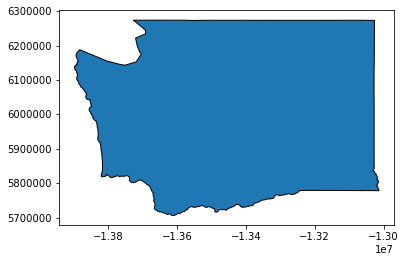

In [124]:
wa_state.plot(edgecolor='black')

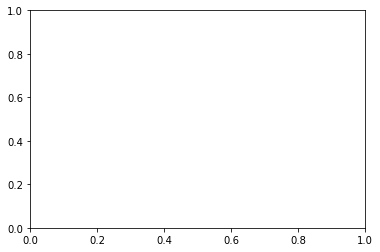

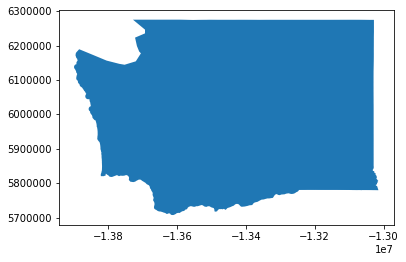

In [138]:
fig, ax = plt.subplots()
fig = wa_state.plot()

In [142]:
file_name_2016 = "/Users/jonhickey/Documents/Flatiron/Phase1/Project1/phase-1-project-west-ds-082420/data/csv_pwa/ss16pwa.csv"

In [143]:
file_name_2016

'/Users/jonhickey/Documents/Flatiron/Phase1/Project1/phase-1-project-west-ds-082420/data/csv_pwa/ss16pwa.csv'

In [153]:
data = pd.read_csv(file_name_2016)

In [154]:
df = pd.DataFrame(data)

In [155]:
df.head()

,RT,SERIALNO,SPORDER,PUMA,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,...,PWGTP71,PWGTP72,PWGTP73,PWGTP74,PWGTP75,PWGTP76,PWGTP77,PWGTP78,PWGTP79,PWGTP80
0,P,2012000000014,1,10502,53,1056030,10,72,1,NaN,...,4,11,3,11,10,12,20,11,20,16
1,P,2012000000058,1,11802,53,1056030,35,58,1,NaN,...,38,35,35,35,35,36,11,58,35,10
2,P,2012000000066,1,10200,53,1056030,3,65,1,NaN,...,6,3,3,2,3,3,1,3,6,1
3,P,2012000000108,1,11501,53,1056030,34,47,1,NaN,...,8,36,59,37,48,56,10,34,13,35
4,P,2012000000247,1,11609,53,1056030,18,51,1,NaN,...,5,16,29,20,35,33,5,17,4,16


In [157]:
df.loc[AGEP]

NameError: name 'AGEP' is not defined